<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment 2</b>


Thank you very much for such a good job! I've left a couple of new comments with digit 2. However, there are no issues that need to be fixed, so I can accept the project. Congratulations and good luck! 😊 
    
 
</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment</b>
    
Hi Mazin, I am a reviewer on this project. Congratulations on submitting another project! 🎉

Before we start, I want to pay your attention to the color marking:
    
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Great solutions and ideas that can and should be used in the future are in green comments.   
</div>    
    
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project.
</div>      
    
    
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. Please note that the project cannot be accepted until these issues are resolved.
    
</div>    

<hr>
    
**Please, use some color other than those listed to highlight answers to my comments.**
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.
    
In addition, my comments are defined as headings. 
They can mess up the content; however, they are convenient, since you can immediately go to them. I will remove the headings from my comments in the next review if you ask me to. 
    
    
<hr>
    
<font color='dodgerblue'>**A few words about the project:**</font> you did an excellent job here, thank you so much for submitting the project! The project has a very good and clear structure, which is very important. It also has a lot of charts. It's good, visualization never hurts. Actually the project is almost perfect, there are only two tiny but still important issues. Would you please take a look at my comments? 
    
    
I will wait for the project for the second review :)
    
    

<hr>
    
Please feel free to schedule a 1:1 with our tutors or TAs, join daily coworking sessions, or ask questions in the sprint channels on Discord if you need assistance. 

</div>

# Determining Video Game Success

Ice is an online store which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. Ice is paying us top-dollar to identify patterns that determine whether a game succeeds or not. Ice hopes to leverage this insight to identify potential blockbusters and plan advertising campaigns accordingly.

We have been given a data set with games released up until 2016. We will explore the data, clean it, note any missing or incorrect data. Then we will analyze the data by summing up regional sales by year, platform, and genre for each title to uncover what patterns successful and unsuccessful titles conform to across the three largest customer regions: N. America, the EU, & Japan. 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
There's an introduction, which is good. It is important to write an introductory part, because it gives an idea about the content of the project.
    
</div>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats as st

df = pd.read_csv('/datasets/games.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
df.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
#Checking for duplicates
duplicate_rows = df[df.duplicated()]
display(duplicate_rows)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating


In [5]:
#Checking for duplicates that may share name, platform, and release year values but differ elsewhere
duplicates = df[df.duplicated(subset=['Name', 'Platform', 'Year_of_Release'], keep=False)]
print(duplicates)

                Name Platform  Year_of_Release   Genre  NA_sales  EU_sales  \
604    Madden NFL 13      PS3           2012.0  Sports      2.11      0.22   
659              NaN      GEN           1993.0     NaN      1.78      0.53   
14244            NaN      GEN           1993.0     NaN      0.00      0.00   
16230  Madden NFL 13      PS3           2012.0  Sports      0.00      0.01   

       JP_sales  Other_sales  Critic_Score User_Score Rating  
604        0.00         0.23          83.0        5.5      E  
659        0.00         0.08           NaN        NaN    NaN  
14244      0.03         0.00           NaN        NaN    NaN  
16230      0.00         0.00          83.0        5.5      E  


We can see the 2 titles missing their Name and Genre info, as well as a Madden 13 title that is a dupe of the PS3 release that contains an additional $100k USD in EU sales but nothing else. All 4 of these rows should be removed. 

In [6]:
#Removing the dupes from our data.
df = df.drop([604, 659, 14244, 16230], errors='ignore')
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16711 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16711 non-null  object 
 1   Platform         16711 non-null  object 
 2   Year_of_Release  16442 non-null  float64
 3   Genre            16711 non-null  object 
 4   NA_sales         16711 non-null  float64
 5   EU_sales         16711 non-null  float64
 6   JP_sales         16711 non-null  float64
 7   Other_sales      16711 non-null  float64
 8   Critic_Score     8135 non-null   float64
 9   User_Score       10012 non-null  object 
 10  Rating           9947 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    

Yes, it's very important to check for the duplicates. Sometimes they can impair the quality of the analysis.

</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
There may be unobvious duplicates in the data, or duplicates in multiple columns. For example, there may be rows that have the same game's name, genre, year of release, platform and age rating, but they may have different user scores for some reason. Try to find them in columns `'name', 'platform', 'year_of_release'`, for instance.  

</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Well done!     
</div>

Our dataset has ~270 titles missing Year of Release, 6k missing User Score and Rating, and missing critic score for around 8k titles. It appears that many, but not all titles, from the NES, GB, DS, and SNES platforms are missing these categories. Furthermore, older titles are more likely to be missing this information than newer titles on average. Perhaps these categories are only available for titles released after a certain year for specific platforms.
There also do not appear to be any more duplicated rows.

In [7]:
#Removing missing values for 2 titles missing name and genre info
#df.dropna(subset=['Name'], inplace=True)
#df.dropna(subset=['Genre'], inplace=True)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    

Agreed.
    
</div>

The 270 titles missing Year of Release represent less than 2% of our data and should be removed.

In [8]:
#Removing titles without a listed year of release
df.dropna(subset=['Year_of_Release'], inplace=True)

We are still missing around half of the critic and user scores, and almost 60% of title ratings across our dataframe. These represent far bigger chunks of our titles and cannot so easily be removed.

In [9]:
#Exploring missing values under user score
df[df['User_Score'].isnull()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


The User score column has 6605 titles with missing values. Not all the missing values are uniform and some read 'tbd'.

In [10]:
# Checking for tbd values in user_score 
df[df['User_Score'] == 'tbd']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [11]:
#Ensuring all missing values are NaN
df['User_Score'] = df['User_Score'].fillna('NaN')

#Converting all tbd values to NaN
df['User_Score'] = df['User_Score'].replace('tbd', 'NaN')

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    

` 'NaN' ` is a string :)    
</div>

In [12]:
#Looking up unique values under Rating column. Should be smaller list than user and critic scores
unique_ratings = df['Rating'].unique()

display(unique_ratings)

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

There are more ESRB categories than exist in their rating system. We will correct the values to better correspond with their ESRB rating

In [13]:
#Correcting K-A and EC values to their ESRB rating
df['Rating'] = df['Rating'].replace('K-A', 'E10+')
df['Rating'] = df['Rating'].replace('EC', 'E')

In [14]:
#Replacing column names to be lower case
df.columns = df.columns.str.lower()

In [15]:
#Converting year of release to an integer to drop .0
df['year_of_release'] = df['year_of_release'].astype(int)

I converted year of release to an integer from a float to remove the floating zero and display '2006.0' as '2006' instead. User score must similarly be converted to a float from an object as it corresponds to a numerical value.

In [16]:
# Converting user score column from an object to numeric
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [17]:
#Seeing what we're working with
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16442 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16442 non-null  object 
 1   platform         16442 non-null  object 
 2   year_of_release  16442 non-null  int64  
 3   genre            16442 non-null  object 
 4   na_sales         16442 non-null  float64
 5   eu_sales         16442 non-null  float64
 6   jp_sales         16442 non-null  float64
 7   other_sales      16442 non-null  float64
 8   critic_score     7981 non-null   float64
 9   user_score       7461 non-null   float64
 10  rating           9766 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [18]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16442.000000,16442.000000,16442.000000,16442.000000,16442.000000,7981.000000,7461.000000
mean,2006.485586,0.263916,0.145934,0.078497,0.047585,68.990853,7.126766
std,5.875568,0.818298,0.506746,0.311118,0.188011,13.920038,1.499411
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


In [19]:
#Creating a new column that sums up total sales
df['total_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
#df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Correct!     
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Don't forget about other regions.

</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
You can also use **sum** with **axis=1** argument:
</div>

```python


df['total_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
```

In [20]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


After an initial peek at the data, we understand it consists of a massive library of 16.5k video game titles spanning 32 years! Given Ice's open-source data, this is a near-exhaustive list of all titles that have been released since then. 40% of titles are missing their ESRB rating, and more than half are missing both their user and critic scores. 
We cleaned the data by:
- Removing ~270 titles missing Name, Genre, and Year of Release
    - At less than 2% of our titles, these are simple steps to facilitate comparisons. 
- Checking for duplicate rows, converting column names to snake case, and converting columns to their correct data types.
- Correcting ESRB ratings for uniformity
- Standardizing missing values across the Score & Ratings columns
- Introducing a new column listing total sales summing up all sales regions

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Please do not forget to add intermediate conclusions about the introductory part. What has been done, what hypotheses about the data we have and what we are going to do next. 

</div>

# Analyzing the Data

In [21]:
#Creating a pivot table counting # of titles released by year
pivot_table = pd.pivot_table(df,
                             index='year_of_release',   # Group by year
                             values='name',             # Count the 'name' column (game titles)
                             aggfunc='count')           # Use count for aggregation

pivot_table

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


We have titles from as early as 1980 to as recently as 2016. The number of titles released roughly doubled in 1991, 1994, and 2002. The number of titles released peaked in 2008 & 2009, before a gradual then steeper decline, with titles released roughly halving in 2012. 

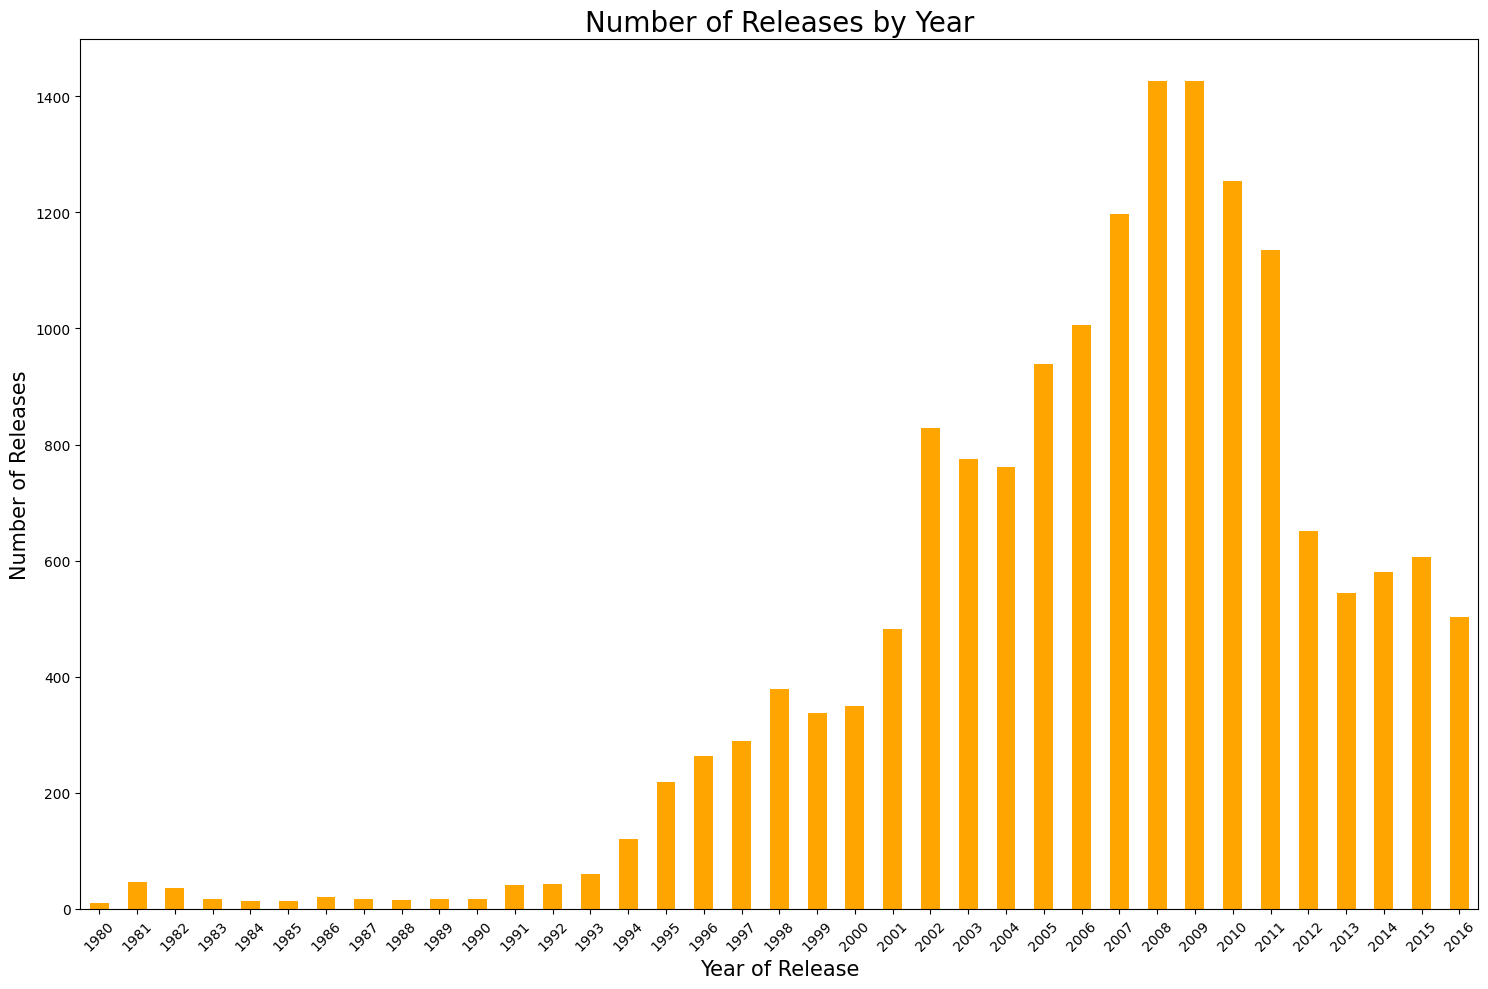

In [22]:
# Plotting the pivot table
pivot_table.plot(kind='bar', color='orange', legend=False, figsize=(15,10))

# Adding labels and title
plt.title('Number of Releases by Year', fontsize=20)
plt.xlabel('Year of Release', fontsize=15)
plt.ylabel('Number of Releases', fontsize=15)
plt.xticks(rotation=45)
# Show the plot
plt.tight_layout()
plt.show()


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Nice chart! It's great that you add a title with axes labels. 
    
</div>

In [23]:
#Sorting titles by platforms to identify those with greatest sales

platform_sales = df.groupby('platform')['total_sales'].sum()
platform_sales_sorted = platform_sales.sort_values(ascending=False)
display(platform_sales_sorted)

platform
PS2     1233.56
X360     961.24
PS3      928.77
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

As any video game lover might have intuitively known, the PS2 is the console with the greatest video game library of titles. The PS2 is followed by the Xbox 360, Nintendo Wii, Sony PS3, and the Nintendo DS. 

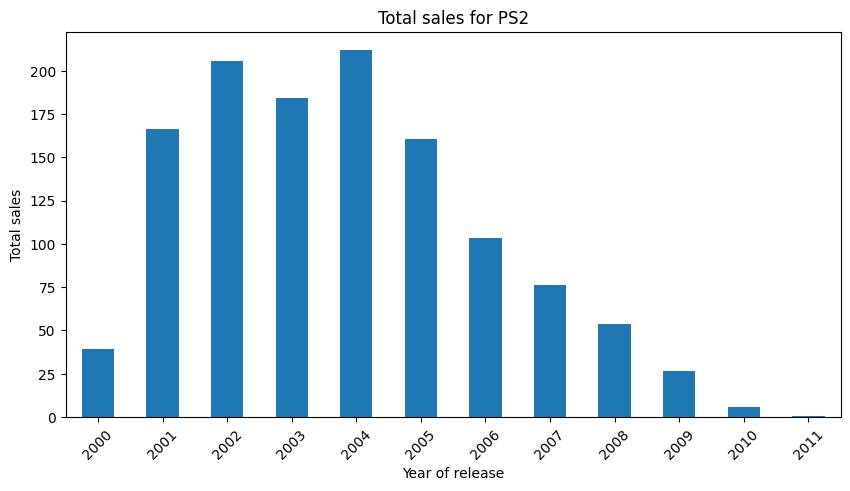

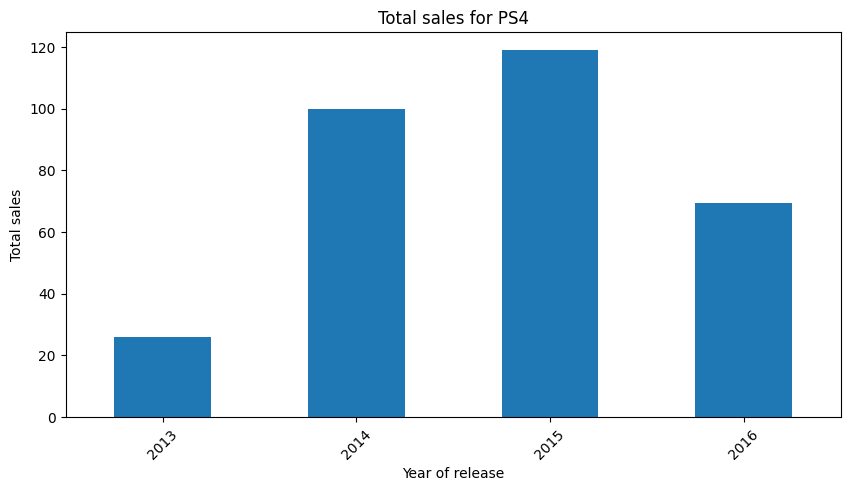

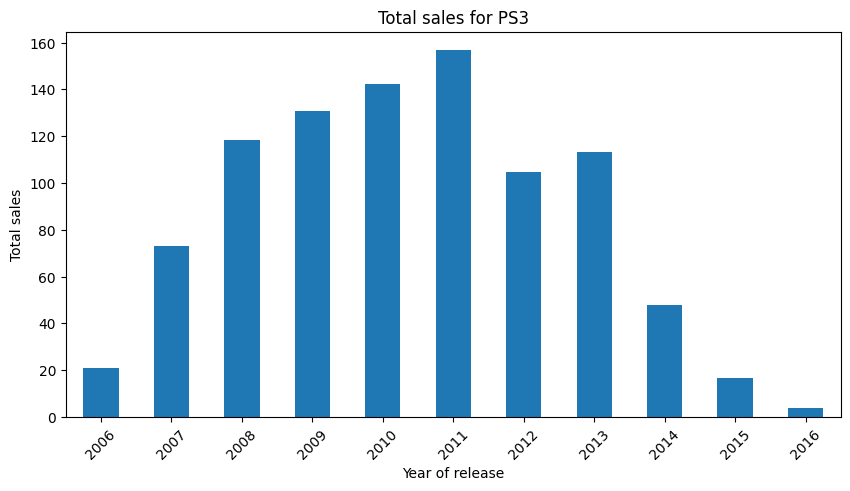

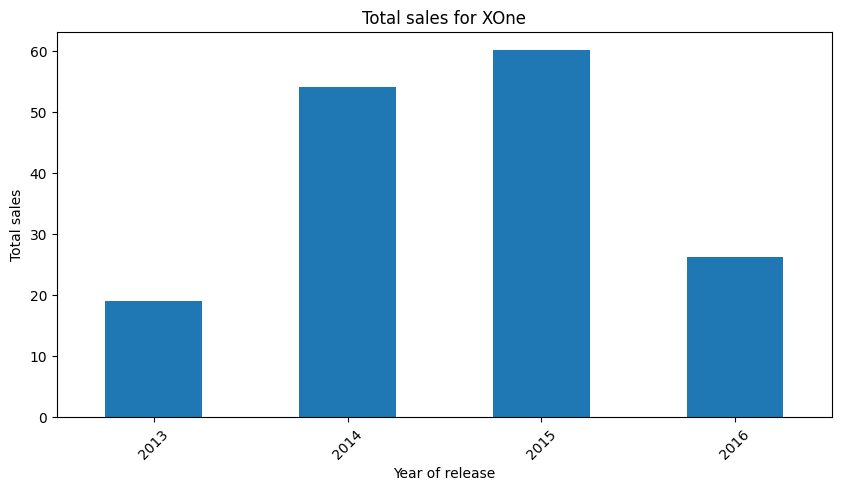

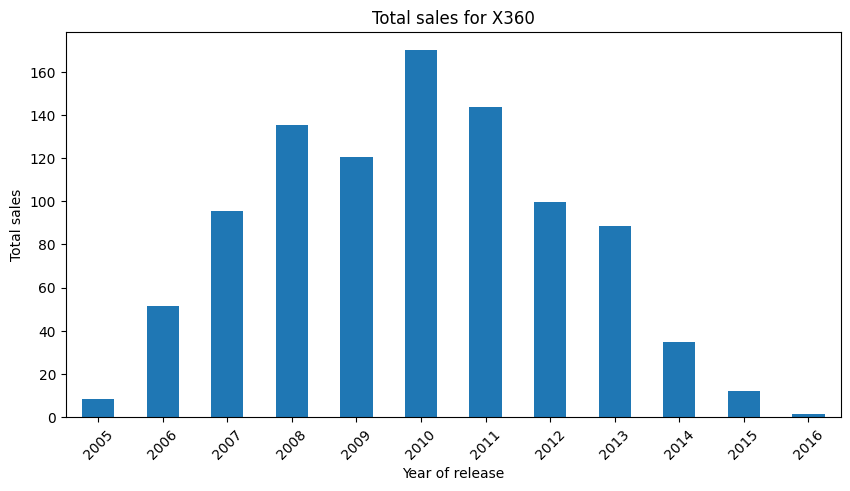

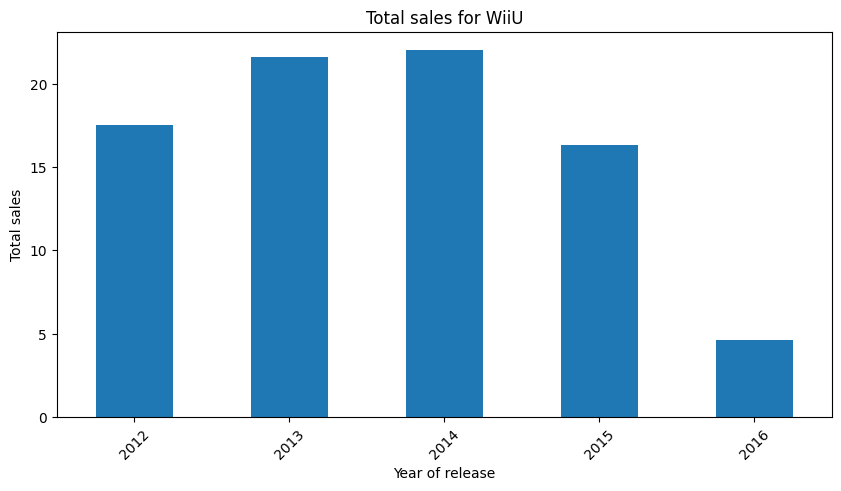

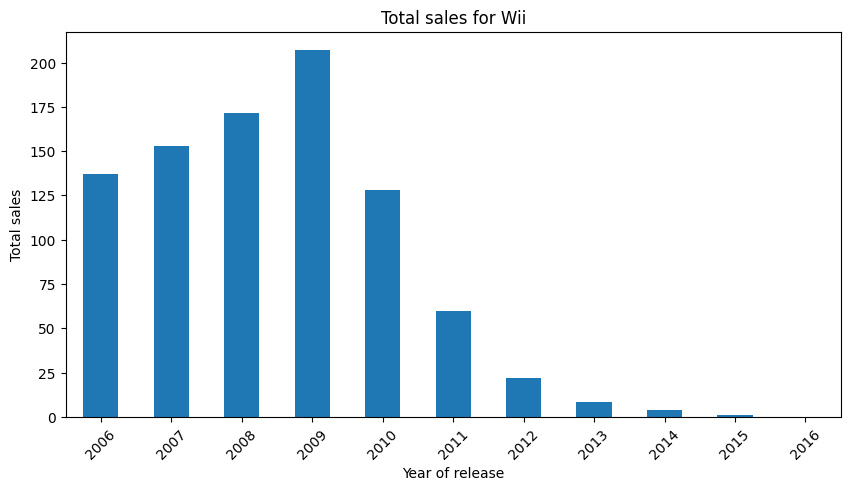

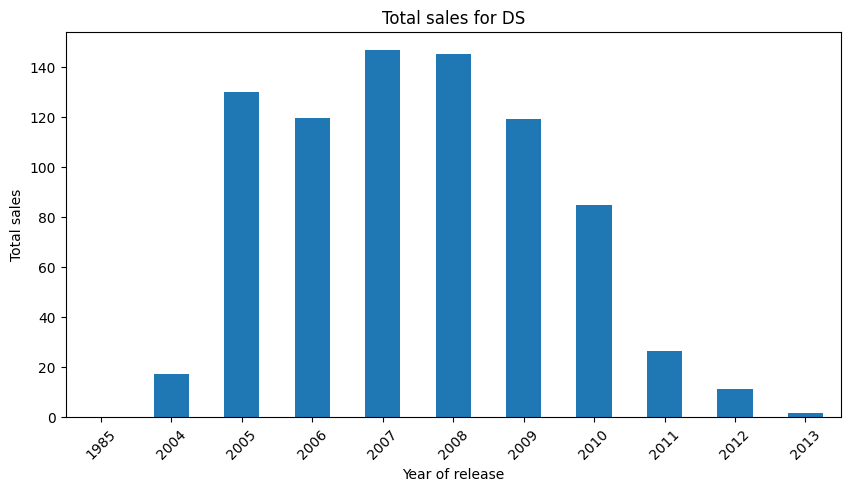

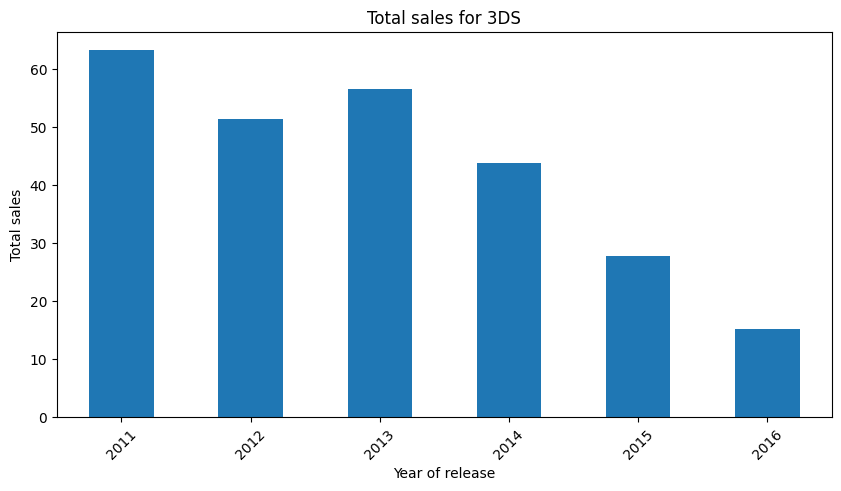

In [24]:
#Creating a variable of popular platforms and looping to get sales by year by platform
platforms = ['PS2', 'PS4', 'PS3', 'XOne', 'X360', 'WiiU', 'Wii', 'DS','3DS']

for platform in platforms:
    df[df['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(10,5))
    plt.title('Total sales for ' + platform)
    plt.xlabel('Year of release')
    plt.ylabel('Total sales')
    plt.xticks(rotation=45)
    plt.legend().set_visible(False)
    plt.show()


The top 5 best-selling platforms to date, the PS2, Xbox 360, & Wii, and DS are all mature consoles with declining sales in the last stage of their product life-cycles, recording their lowest-sales since introduction last year. These platforms are on their way out and being replaced by the two generations of consoles that have come out since. Only a few bright spots exist amid the declining sales, with the Xbox One and PS4 showing promising signs of growth. 

The popular platforms collectively follow a pattern:
- Modest sales in the first year, followed by explosive growth in Year 2
- Sustained success and steady growth from Year 2 for 3-4 years
- Years 3 & 4 are the years with the greatest sales in 3/5 platform life cycles we are exploring. 
- Title sales show weakening demand by Year 6
- A life cycle of around 11 years on average from introduction to plummeting sales and waning popularity.

This can be explained by the product adoption life cycle, where new products are initially only acquired by the vanguard (innovators and early adopters) as the new product steadily grows and changes the buying behavior of the majority of consumers. 

Given that we are tasked with identifying blockbuster titles for 2017, coupled with the insight that titles tend to experience their most explosive growth in the first 4 years, it makes sense to limit the timeframe of the dataset to titles released within the last 3 years.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Makes sense!     
</div>

In [25]:
#Limiting dataframe to titles released in 2014 or later
recent_data = df[(df['year_of_release']>= 2014)]

print(recent_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           940 non-null    object 
 11  total_sales      1689 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 171.5+ KB
None


In [26]:
display(recent_data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


We're left with a much smaller dataset of 1,689 titles. Similarly to the original dataset, around 60% of these titles are missing their critic scores, and roughly 50% missing user scores and ratings.

In [27]:
#Creating a pivot table showing platform distribution of titles
pivot_table = pd.pivot_table(recent_data,
                             index='platform',          # Group by platform
                             values='name',             # Count the 'name' column (game titles)
                             aggfunc='count')           # Use count for aggregation

sorted_pivot_table = pivot_table.sort_values(by='name', ascending=False)
display(sorted_pivot_table)

,name
platform,
PS4,376
PSV,295
XOne,228
PS3,219
3DS,212
PC,151
X360,111
WiiU,73
PSP,13


In [28]:
#grouping total sales by platform to see best-sellers
total_sales = recent_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
display(total_sales)

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64

In [29]:
#platforms = total_sales.index

# Repeating our previous loop for the more recent titles for the platforms listed above. 
#for platform in platforms:
    #recent_data[recent_data['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(15,10))
    #plt.title('Total sales for the ' + platform)
    #plt.xlabel('Year of release')
    #plt.ylabel('Total sales')
    #plt.show()

The bar charts above tell us that:
- PS4 sales are at a 3 year low
- Xbox One 2016 sales are down over 50% 
- 3DS sales are in steady decline
- PS3 sales are similarly declining linearly
- Xbox 360 sales are declining exponentially for the last 3 years
- WiiU sales were three times less than last year
- PC sales saw steady declines which slowed to 33% in 2016
- Wii sales are declining exponentially

In summary, every single platform explored is in a state of sales decline, ranging from  modest to aggravated. Even so we need to identify blockbusters. These are likely to come from platforms that have the most sales in this period with the most modest sales declines from 2015 to 2016.

These would be the PS4 with 60M sales in 2016, Xbox One with 25M in 2016 sales, and 3DS with 15M. 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Correct! Sometimes it is much easier to analyze a simple pivot table: 
    
</div>

In [30]:
# Reviewer's code

recent_data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


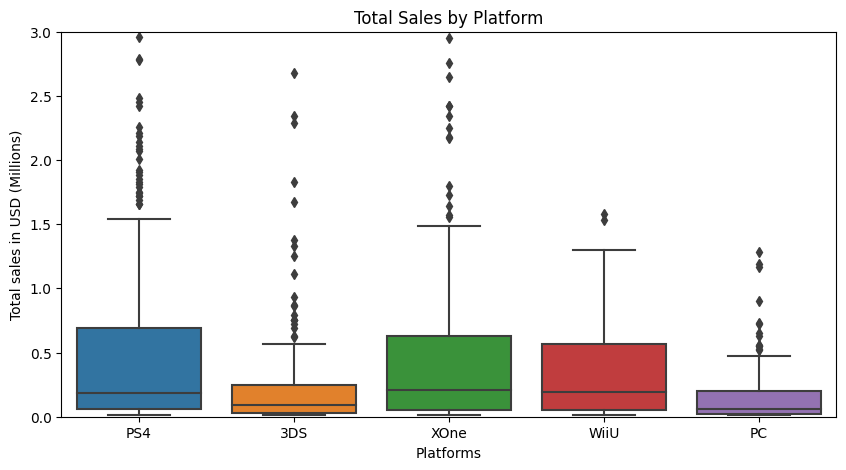

In [31]:
#Building a box plot for the global sales of all games, broken down by top 5 platforms by 2016 sales

data = recent_data.query('platform in ["PS4", "XOne", "3DS", "PC", "WiiU"]')
plt.figure(figsize=(10, 5))
(sns.boxplot(data = data, y = 'total_sales', x='platform')
.set(title = 'Total Sales by Platform', xlabel = 'Platforms', ylabel = 'Total sales in USD (Millions)'))
plt.ylim(0,3)
plt.show()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2</h2>
    
Excellent!     
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    

It is difficult to compare the boxes. Please, try to use **ylim**, it will scale the graph.
</div>

In [32]:
# Group by platform and calculate the average sales
avg_sales_by_platform = recent_data.groupby('platform')['total_sales'].mean().sort_values(ascending=False)

# Display the result
print(avg_sales_by_platform)

platform
PS4     0.766356
XOne    0.615614
WiiU    0.588767
Wii     0.460909
X360    0.434414
3DS     0.408868
PS3     0.311324
PC      0.179139
PSV     0.075932
PSP     0.027692
Name: total_sales, dtype: float64


The PS4 has the greatest average sale at 0.64 million. This is followed by the Xbox One and WiiU at .56 million & .54 million respectively.

    - The PS4 has an interesting distribution of outliers, given that it has far more than any other console, bringing in 2-10 times the amount in average sales as the average PS4 title. This is no easy feat given the fact that PS4 titles bring in over 750k USD on average, ranking #1 among all consoles. This suggests that the PS4's impressive title sales are driven largely by an engine of up to three dozen ultra popular titles. 

    - The Xbox One and 3DS platforms also have a significant number of outliers, suggesting that like the PS4, they realize a sizeable amount of revenue from just several dozen very well-selling titles, although not to the same extent. This explains why the average sales for these consoles is so much higher than their median sales. The blockbusters are upping the averages.
    
    - The WiiU sold similarly to the Xbox One, with the third highest average sales by platform, surpassing PCs by 350%. Pc's however have 3-4 times as many extreme outliers than the WiiU meaning that an even greater proportion of the PC's modest sales are derived from a select few over performing titles. 

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    

What can you say about the outliers here? What do they mean? 

</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2</h2>
    

A boxplot shows us a distribution, like a histogram. 2 pictures below represent it: 


![image info](https://r-charts.com/en/distribution/histogram-boxplot_files/figure-html/histogram-boxplot.png)


![image.png](https://i.ytimg.com/vi/FPREzlHdWRY/maxresdefault.jpg)



But the boxplot is better, since we don't have to think about `bins` parameter for a histogram. Boxplot also shows us some statistics, while histogram doesn't. 


What does our boxplot tell us about? Since we are plotting sum world sales per game, outliers are just some very popular games. I would even say bestsellers. And this is a very illustrative thing. Look at the 3DS. Small box and lots of outliers. This suggests that a large part of the sales volume comes from these outliers. At the same time, the XOne has a different situation: a large box, a long whisker and few outliers. This indicates that a wide variety of games are bought on XOne, and, moreover, in considerable quantities.

That's why it may be useful to plot 2 graphs: with and without outliers. Just to evaluate the distribution.
</div>

# Do User & Professional Reviews affect Sales?
## User Scores vs. PS4 Sales

We will explore the PS4 platform's relationship between reviews and sales. PS4 was selected as it is the console with the greatest sales in the time period we are interested in i.e. last 3 years

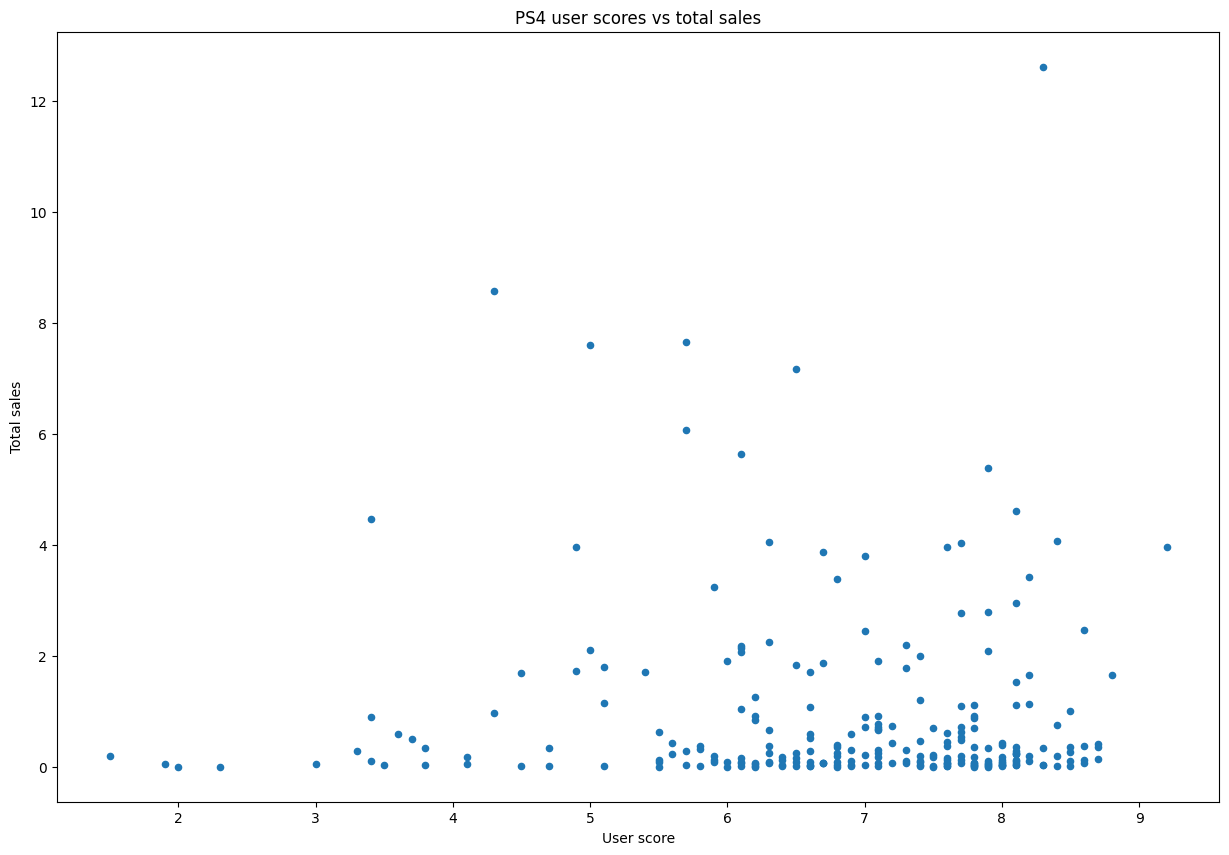

-0.040131589472697356

In [33]:
# PS4 user scores vs total sales
recent_data.query('platform == "PS4"').plot(x='user_score', y='total_sales', kind='scatter', figsize=(15,10))
plt.title('PS4 user scores vs total sales')
plt.xlabel('User score')
plt.ylabel('Total sales')
plt.show()


# calculate the correlation between user_score and total_sales
recent_data.query('platform == "PS4"')['user_score'].corr(df.query('platform == "PS4"')['total_sales'])

Our correlation of -0.039 is very close to 0 meaning there is a nearly non-existent relationship between what user scores a title receives and sales.

## Professional (Critic) Scores vs. PS4 Sales

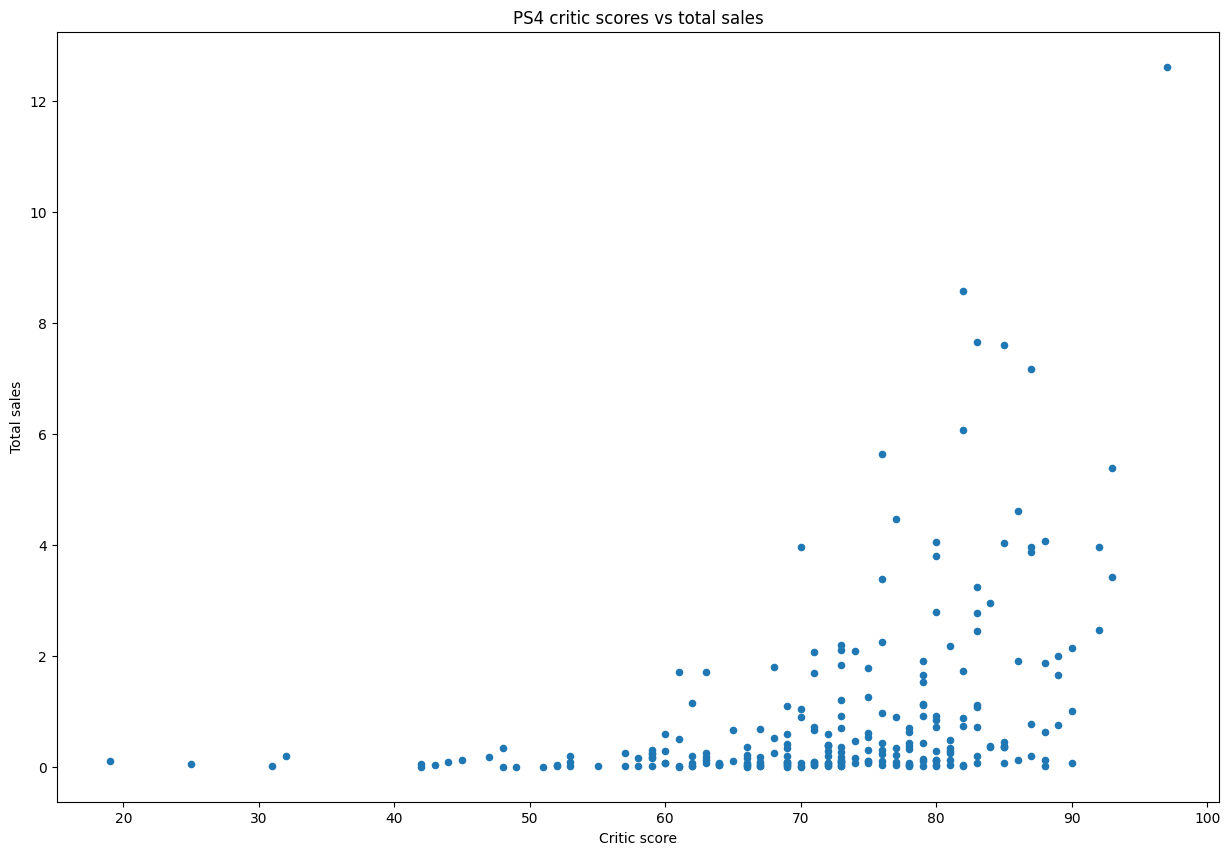

0.40266141068104083

In [34]:
# PS4 critic scores vs total sales
recent_data.query('platform == "PS4"').plot(x='critic_score', y='total_sales', kind='scatter', figsize=(15,10))
plt.title('PS4 critic scores vs total sales')
plt.xlabel('Critic score')
plt.ylabel('Total sales')
plt.show()

# calculate the correlation between critic_score and total_sales
recent_data.query('platform == "PS4"')['critic_score'].corr(df.query('platform == "PS4"')['total_sales'])

Whereas user scores had a negligible effect (if at all) on PS4 sales, critic scores are a different story with a much more significant correlation of 0.4. Even looking at the scatter plot, we can see that the best-selling titles all received critic scores of 70 or above. Critic scores are far greater determinants of a title's success on the PS4 than user reviews, as there is a moderate correlation where the highest scored titles tend to be among the best selling. 

We will explore the Xbox One, as it is the next highest selling platform in the time period we are interested in (2014 and later) to confirm whether the same relationships between critic and user scores exist relative to sales.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    

Correct! 

</div>

## User Scores vs. Xbox One Sales

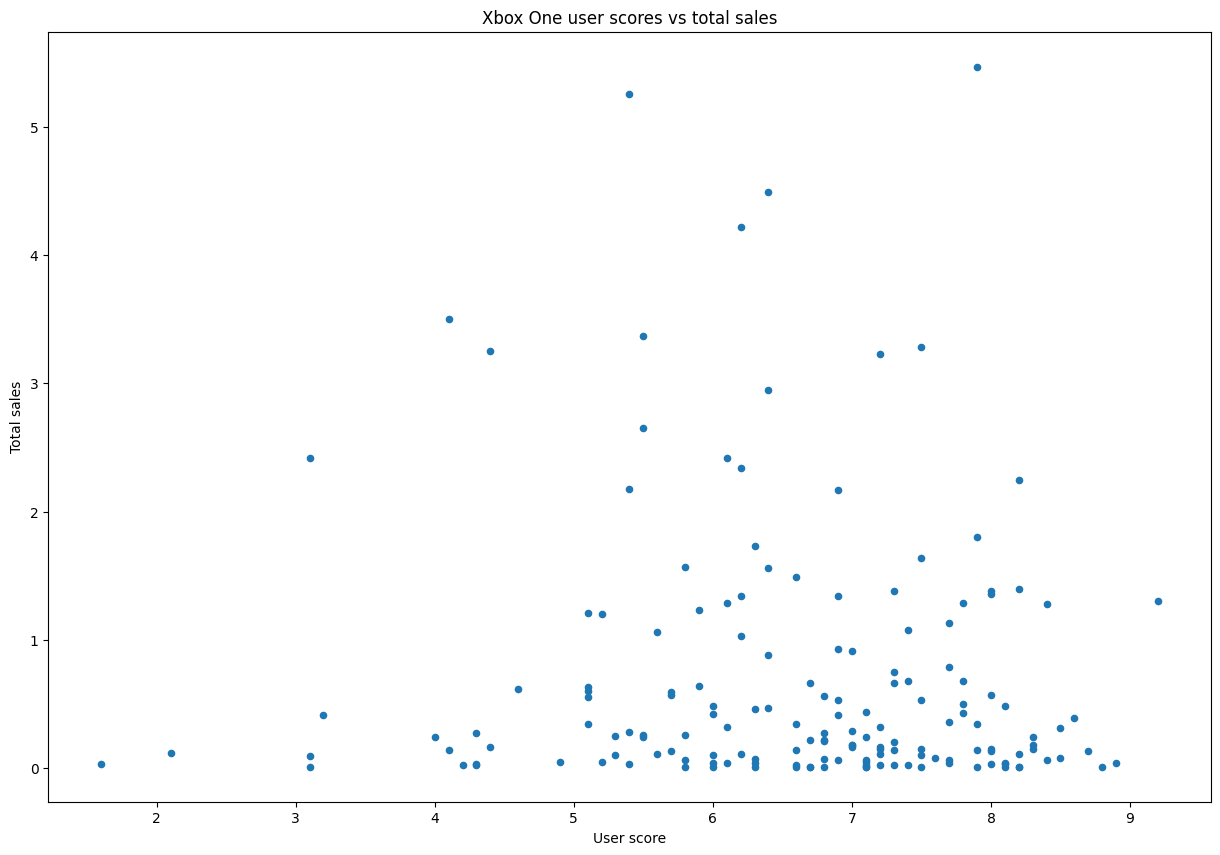

-0.0703839280647581

In [35]:
# Xbox One user scores vs total sales
recent_data.query('platform == "XOne"').plot(x='user_score', y='total_sales', kind='scatter', figsize=(15,10))
plt.title('Xbox One user scores vs total sales')
plt.xlabel('User score')
plt.ylabel('Total sales')
plt.show()

#Removing nans from user scores
recent_data['user_score'].dropna()

# calculate the correlation between user_score and total_sales
recent_data.query('platform == "XOne"')['user_score'].corr(df.query('platform == "XOne"')['total_sales'])

This is a very weak correlation as it is close to 0 meaning any effect User 

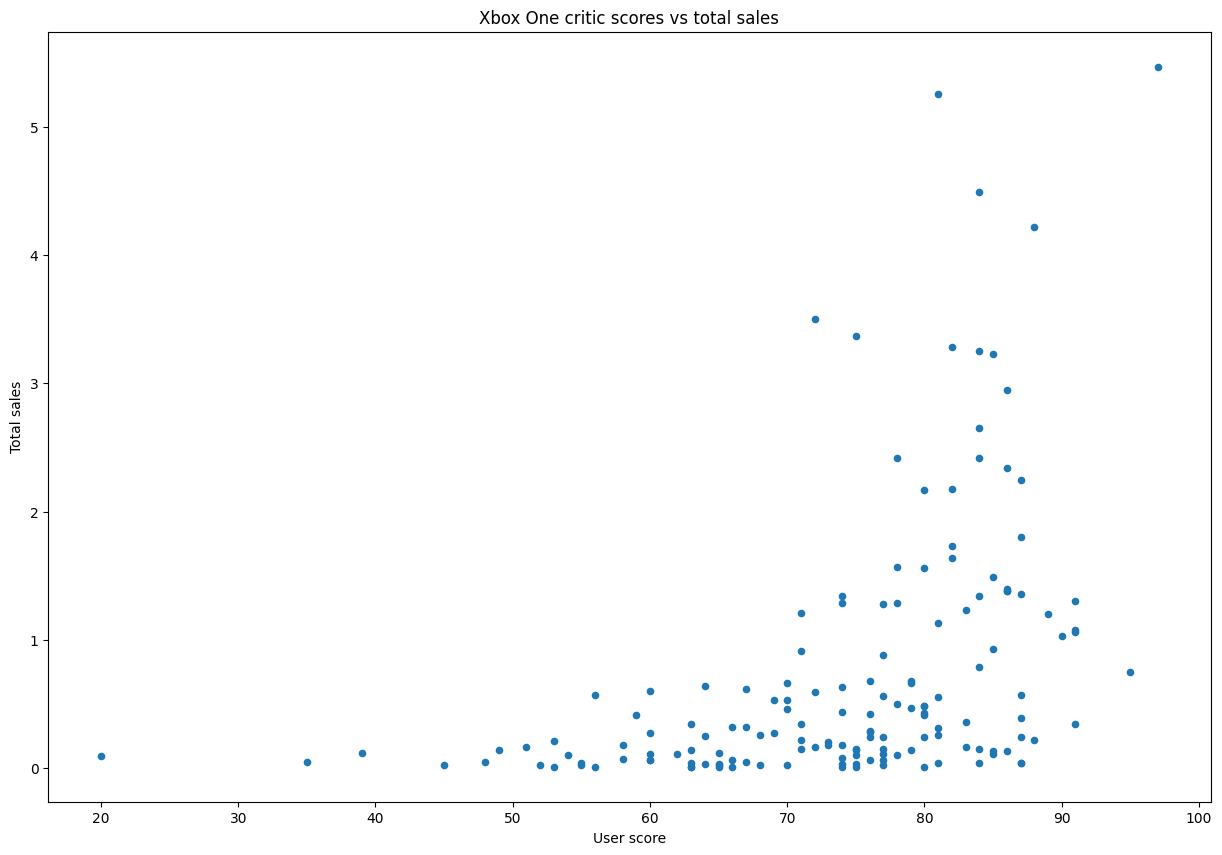

0.42867694370333226

In [36]:
# Xbox One critic scores vs total sales
recent_data.query('platform == "XOne"').plot(x='critic_score', y='total_sales', kind='scatter', figsize=(15,10))
plt.title('Xbox One critic scores vs total sales')
plt.xlabel('User score')
plt.ylabel('Total sales')
plt.show()

# calculate the correlation between critic_score and total_sales
recent_data.query('platform == "XOne"')['critic_score'].corr(df.query('platform == "XOne"')['total_sales'])

The same pattern of critic scores being more correlated to sales than user scores for PS4's holds true here with the Xbox One. Whereas user score had no bearing on sales, there is a much more moderate correlation here between critic scores and Xbox One sales. 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    

Good job here! 
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    

You can add more platforms in this comparison. 
</div>

# Looking at Games By Genre

We will explore the cross-platform distribution of all video game titles across genress

In [37]:
display(recent_data.groupby('genre')['name'].count().sort_values(ascending=False))

genre
Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: name, dtype: int64

Action is clearly the most popular genre of video games. It is more popular than the next three genres combined. 

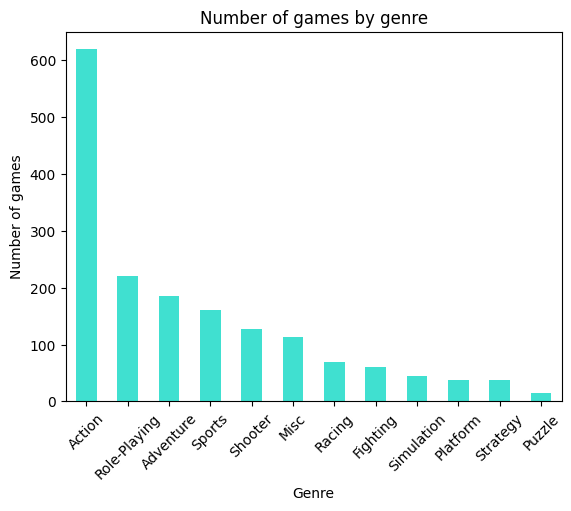

In [38]:
# Plotting titles by genre
recent_data.groupby('genre')['name'].count().sort_values(ascending=False).plot(kind='bar', color='turquoise')
plt.title('Number of games by genre')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.ylabel('Number of games')
plt.show()

The popularity of Action titles across all genres in the last 3 years is better reflected visually, and we can easily see how it dwarfs other genre categories. The least popular genres are all 'slower paced', such as Puzzles, Strategy and Simulation games. The one exception to this is Role-Playing games, which traditionally can be seen as slow but is the second most popular genre across all platforms recently. 

As for predicting 2017's blockbuster titles, we know that they will probably be faster-paced titles such as Action and Sports, or an RPG. We also know that next year's big hits are very likely to have high critic ratings. 

In [39]:
display(recent_data.groupby('genre')['total_sales'].median().sort_values(ascending=False))

genre
Shooter         0.515
Sports          0.180
Platform        0.140
Fighting        0.125
Role-Playing    0.110
Simulation      0.100
Action          0.090
Misc            0.090
Racing          0.090
Strategy        0.060
Puzzle          0.045
Adventure       0.030
Name: total_sales, dtype: float64

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Very smart. Action could make such volumes only due to the large number of games, so it's better to evaluate median or mean as well. 
</div>

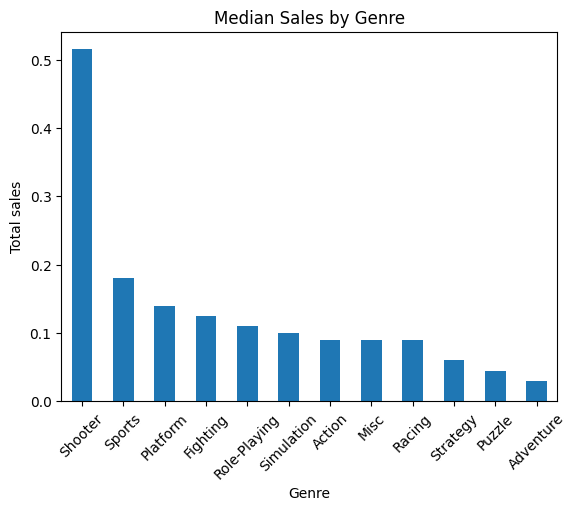

In [40]:
recent_data.groupby('genre')['total_sales'].median().sort_values(ascending=False).plot(kind='bar', rot=45)
plt.title('Median Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total sales')
#plt.xticks(rotation=45)
plt.show()

Looking at the median sales figures, they went against my assumptions that Action & RPGs would have the greatest sales, justifying the depth of the title libraries for those categories. Although Shooters are only the fifth most popular game category in number of titles, they are the best selling genre by a factor of 3 compared to the next best-selling category, Sports. Sports' sales success is also surprising considering it is only the fourth most popular game category by title count. This suggests that Shooter and Sports sales are clustered around a smaller number of titles than other categories on average i.e. those categories are dominated by a few highly-popular games. 

The three worst-selling categories are Strategy, Puzzle, and Adventure. Strategy and Puzzle games are the two smallest categories in terms of game libraries, and their poor sales is thus nont surprising. Platform games however, is the fourth best selling category despite being the third smallest in number of games. Similarly, Adventure games might be the biggest shock. Despite being the third-largest games category in library size, it is easily the worst-selling category. Perhaps consumers have reached their limit on Adventure titles in a saturated marketplace.

In this light we revise our previous statement regarding what 2017's blockbuster title might look like. It will likely be a shooter rather than an Action or RPG game. 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Correct! </div>

# User Profiles by Region

We will explore how user consumption and trends differ across North America, Europe, and Japan. 

In [41]:
#Exploring sales by platform by Region
matrix = recent_data.groupby('platform')[['na_sales', 'jp_sales', 'eu_sales']].sum().sort_values(by='na_sales', ascending=False)
display(matrix)

,na_sales,jp_sales,eu_sales
platform,,,
PS4,98.61,15.02,130.04
XOne,81.27,0.32,46.25
X360,28.30,0.08,15.49
3DS,22.64,44.24,16.12
PS3,22.05,11.22,25.54
WiiU,19.36,7.31,13.15
PC,7.23,0.00,17.97
PSV,2.52,14.54,3.53
Wii,2.08,0.00,2.59


In [42]:
#Exploring sales by platform by the NA Region
matrix1 = recent_data.groupby('genre')[['na_sales', 'jp_sales', 'eu_sales']].sum().sort_values(by='na_sales', ascending=False)

display('Regional Platform Title Sales Ranked by N. American Sales')
display(matrix1)

'Regional Platform Title Sales Ranked by N. American Sales'

,na_sales,jp_sales,eu_sales
genre,,,
Shooter,79.02,4.87,65.52
Action,72.53,29.58,74.68
Sports,46.13,3.26,45.73
Role-Playing,33.47,31.16,28.17
Misc,15.05,5.61,12.86
Fighting,12.43,6.37,6.69
Racing,8.74,1.76,14.13
Platform,6.79,2.69,6.80
Adventure,5.64,3.60,6.49


### North America

Top 5 genres = Shooter, Action, Sports, Role-playing (RPG), and Misc.

Sales here are dominated by the PS4 and Xbox One. Together, their revenue is greater than the rest of the platforms combined. North America is the only region where sales are so evenly split between the Xbox 360, 3DS, PS3, and WiiU, the next four best selling platforms. 

Shooters and Action Games dominate the North American market, and together, these two categories earn more revenue than the rest of the genre list combined. Sports games are also well-represented as the third best-selling genre. On the other end, Simulation, Strategy and Puzzle games languish in the bottom three positions in overall sales. 

The average North American user is purchasing a PS4 or Xbox One title that is either a Shooter, Action, or Sports game, in that order. 

In [43]:
display('Regional Platform Title Sales Ranked by Japanese Sales')
matrix = recent_data.groupby('platform')[['jp_sales','na_sales', 'eu_sales']].sum().sort_values(by='jp_sales', ascending=False)
matrix

'Regional Platform Title Sales Ranked by Japanese Sales'

,jp_sales,na_sales,eu_sales
platform,,,
3DS,44.24,22.64,16.12
PS4,15.02,98.61,130.04
PSV,14.54,2.52,3.53
PS3,11.22,22.05,25.54
WiiU,7.31,19.36,13.15
PSP,0.36,0.00,0.00
XOne,0.32,81.27,46.25
X360,0.08,28.30,15.49
PC,0.00,7.23,17.97


### Japan

Top 5 genres = RPG, Action, Fighting, Misc, and Shooter

Sales here are dominated by the 3DS, and this single platform's sales is greater than the remainder of the platforms combined.

Japan differs greatly from the other regions. In terms of platforms, Japan is the only region where:
- the Xbox One sold abysmally at a neglible 320k USD. This ranks it seventh, as opposed to elsewhere where the Xbox One is the second most popular console
- one platform outperformed all others combined. 
- the PS4 was not the most popular console. Rather it is the second but less than 1/3 as popualr as the Japanese #1, the 3DS
- the PS4 did not outsell the 3DS by a factor of 5 or more as is the case in the other two regions. 
- the 3DS is highly popular, as it ranks only fourth in the EU and North America.
- the PSV was extremely popular, ranking just behind the PS4. This is one of the biggest differences as in Europe and N. America, the PSV was the third least popular console and outsold by the PS4 almost 50 times. In Japan, it is the third most popular console, and less than half a million away in sales from the PS4.
- where the PS4 did not outsell the PS3 by 5x. 

As for genres, Japan is the only region where:
- Role Playing Games (RPGs) was the number one genre, as it ranked only fourth in Europe and N. America
- Shooters were not amongst the top two categories, instead languishing in fifth. 
- Sports were not the third most popular category, instead ranking seventh. Sports titles are nowhere near as popular in Japan as other regions. 

Despite the surprising news that Shooters do not do well in Japan, Action games which do well globally, are the second-best selling genre, just behind RPGs. 

The average Japanese user is purchasing a 3DS title that is a RPG or Action title. 

In [44]:
display('Regional Platform Title Sales Ranked by EU Sales')
matrix = recent_data.groupby('platform')[['eu_sales','na_sales', 'jp_sales']].sum().sort_values(by='eu_sales', ascending=False)
matrix

'Regional Platform Title Sales Ranked by EU Sales'

,eu_sales,na_sales,jp_sales
platform,,,
PS4,130.04,98.61,15.02
XOne,46.25,81.27,0.32
PS3,25.54,22.05,11.22
PC,17.97,7.23,0.00
3DS,16.12,22.64,44.24
X360,15.49,28.30,0.08
WiiU,13.15,19.36,7.31
PSV,3.53,2.52,14.54
Wii,2.59,2.08,0.00


### EU

Top 5 genres = Action, Shooter, Sports, RPG, and Racing


The EU region is fairly similar to the N. American market with slight differences. For example, the PS4 and Xbox One were the top two selling consoles, but whereas the Xbox One is less than 20% behind the PS4 in America, it is outsold by the PS4 almost 3x in Europe i.e. the Xbox One is not as popular as in America but still in second place. 

Like Japan, the PS3 is the third most popular console in the EU, and somewhat more popular relative to other consoles than N. America. Lastly, PC games are more popular in Europe than they are in N. America. 

Much like N. America, Europe has the same categories in its top four, with the exception of Action and Shooters being the first and second most popular rather than the other way around as it is in N. America. 

Just like the North American user, the average EU user is purchasing a PS4 or Xbox One title that is an Action, Shooter, or Sports title. 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>

    
There are some similarities between Europe the Northern America, while  people in Japan prefer portable platforms and japanese market. We definitely should not recommend them XBox :)  In addition, Japanese also don't like shooters as much as in NA and EU people do.  
 
</div>   
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
It will be great if you display the top-5 pivot tables for each region. Then a reader will not need to look for the top-5 platforms or genres in the pivot tables above. 
</div>

###### Effect of ESRB ratings on Sales

In [45]:
# Group the titles by ESRB rating and sum the regional sales
ESRB = recent_data.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum().sort_values(by='na_sales', ascending=False)
ESRB

,na_sales,eu_sales,jp_sales
rating,,,
M,96.42,93.44,8.01
E,50.74,58.06,8.94
T,38.95,34.07,14.78
E10+,33.23,26.16,4.46


Titles rated 'Mature' fare best in the North American and European markets, but are third best in Japan. The EU and N. America have similar distributions for ESRB rating popularity, whereas in Japan 'Teen' titles fared best. In all three regions explored, 'E' rated titles sold second-best, and 'E10+' sold the worst. These two categories are fairly similar yet sold very differently throughout our 3 regions. 

We must keep in mind that our recent_data dataset is incomplete, with 940 of the 1,689 titles from the last three years missing a rating. With 55% of the titles missing an ESRB rating it is difficult to generalize with any confidence. 

We do however have a another datapoint for our respective user profiles and can update them to suggest that:
- The average N. American & European user consumes titles rated 'M' and 'E', and the likeliest rating for the next N. American blockbuster is 'M'.
- The average Japanese user consumes titles rated 'T' and 'E', and the next Japanese blockbuster is highly likely to be rated 'T'.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>

    
Good!  
</div>   

# Hypothesis testing

Now that we have a better understanding of what 2017's blockbuster's will look like in the different regions, we will test the following hypotheses:

- Average user ratings of the Xbox One and PC platforms are the same.
- Average user ratings for the Action and Sports genres are different.

We will make two assumptions, that variance is not equal for the platforms and genres, and that the p-value for statistical significance should be set at 0.05. This means we will accept a relationship between the ratings for the platforms and genres if there is less than a 5% chance of observing the correlation. 
 

###### Testing whether Average User Ratings of the Xbox One and PC platforms are the same

Null Hypothesis (H0) = There is no difference between average user ratings for the Xbox One & PC
Alternative Hypothesis (H1) = The average user ratings for the Xbox One & PC differ

We will perform a two-tailed t-test on Xbox One & PC platforms, as a change in either direction can help us reject the null hypothesis. 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>

    
Good. The null hypothesis always includes the equality sign. This is because the test does not understand exactly how we set the problem: we can say, for instance, let's make sure that they are not equal. Or that they are equal. And regardless of the purpose of our study, we always put equality at null hypothesis. Then the test result is interpreted correctly.

</div>   

In [46]:
# Filter for Xbox One & PC titles that have user ratings 
xone_ur = recent_data.loc[recent_data['platform'] == 'XOne', 'user_score'].dropna()
pc_ur = recent_data.loc[recent_data['platform'] == 'PC', 'user_score'].dropna()

# Initialize the alpha value 0.05
alpha = 0.05

# Run the t-test, passing both filtered variables and assuming variance is not equal
result = st.ttest_ind(
    xone_ur,
    pc_ur,
    equal_var = False)

# Print the p-value
print('p-value: ', result.pvalue)

# if-statement displaying the outcome
if (result.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")


p-value:  0.11601398086668832
We can't reject the null hypothesis


Even at the next most common p-value threshold of 10% we would not be able to reject the null hypothesis. Xbox One and PC titles appear to have similar user ratings and there is less than an 11% chance of this being the case by chance.

###### Testing whether Average user ratings for the Action and Sports genres are different.

Null Hypothesis (H0) = There is no difference between average user ratings for Action and Sports games
Alternative Hypothesis (H1) = The average user ratings for Action and Sports games differ

We will perform a two-tailed t-test on Action and Sports titles across all platforms, as a change in either direction can help us reject the null hypothesis. 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>

    
Correct. 
</div>   

In [47]:
# Filter for Action & Sport titles that have user ratings 
action = recent_data.loc[recent_data['genre'] == 'Action', 'user_score'].dropna()
sport = recent_data.loc[recent_data['genre'] == 'Sports', 'user_score'].dropna()

# Initialize the alpha value 0.05
alpha = 0.05

# Run the t-test, passing both filtered variables and assuming variance is not equal
result = st.ttest_ind(
    action,
    sport,
    equal_var = False)

# Print the p-value
print('p-value: ', result.pvalue)

# if-statement displaying the outcome
if (result.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")


p-value:  1.1825550382644557e-14
We reject the null hypothesis


We can handily reject the null hypothesis here with a tiny P-value that tells us with a great deegree of confidence that there is a marked difference between the average user ratings of Sports and Action titles. 

# Conclusion

###### Global Insights
We were tasked with identifying the best selling titles of 2017 based on previous sales figures, and the creation of user profiles for our largest user regions. We know that next year's global best seller is:
- likely to be a PS4 or Xbox One game.
    PS4 is by far the console with the best-selling titles on average globally. Xbox One titles also sell very well, and collectively, PS4 and Xbox One titles have the highest average sales, and sell more than the next 8 consoles combined. 
- likely to be a Shooter (may be an Action or Sports title)
    Action games are the best selling globally over the last 3 years, followed closely by Shooter titles. Shooters however have the highest median sale by far at almost half a million dollars! This is almost 3 times greater than the second-highest, Sports games. While all three categories will sell well next year, 2017's blockbuster will likely be in the category with the highest median sales, which is Shooters by far. This leads me to believe that 2017's blockbusters will include several Shooters.   
    
- likely have high critic scores. 
    We explored the relationship between PS4 critic scores and sales, as well as Xbox One critic scores and sales. With a correlation of 0.4+ in both cases, this shows that the two likeliest platforms by far for 2017's blockbusters are influenced by critic ratings and moderately positively related. This means that the better a critic rating for a PS4 or Xbox One title, the better sales will be. Therefore, next year's best selling titles will likely be among the most critically acclaimed. 

###### Regional Insights
- The next blockbusters in North America & the EU will likely be for PS4 and Xbox One titles that are either Shooters, Action, or Sports games.

- The next blockbusters in Japan will almost certainly be either a Role-Playing or an Action game. These two genres dominate the Japanese market. 
    - As for what platforms they will be released on, this is a trickier question as Japan bucks international trends. The Xbox One is one of the most popular platforms globally, but one of the least popular in Japan. The inverse is true of the 3DS which is huge in Japan, and only Japan, with 44 million of its 83 million in sales over the last 3 years taking place there. This appears to be a Japanese-specific trend that is slowly dying. While the data suggests that the next Japanese blockbuster will likely be released for the 3DS, it is my belief that the Japanese market will be far more receptive to the PS4 in line with what we have witnessed across the other regions recently. 3DS is the platform of yesterday, and given it's declining sales, I believe that the PS4 titles will experience Japanese growth in 2017
    
###### The next global blockbuster title will most likely be a Shooter for the PS4 that is well-reviewed by critics. 





<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>

    
Great! 
</div>   

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>

    
You do not need to add code in the final conclusion. 
</div>   

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>

    
Good! </div>   